In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# NumPy

### Goals

 - What is numpy?: array, ndarray, and some operations
 

In [3]:
# These are the standard "qualified" (as) imports
import numpy as np # This is the canocial import 

## NumPy

If you've ever used MATLAB, you know that writing out loops to add two vectors / find dot products / multiply two matrices / etc. is possible but _very_ slow.  Instead, you should use "vectorized" built-in operations that can do the looping in a faster language or even pick a better algorithm.

Python is similar.  _Numpy_ is the package that provides the means to do performant numerical calculations in Python.  If you've converted your problem into linear algebra and matrices, then _numpy_ will let you write it to run fast.

**Why are Python arrays unsuitable for numerical computation?**

There are two basic reasons why Python on its own is insufficient here:
  - _Data structure._  A Python list is a complicated thing. Just consider something like:
        
           x = [1, "23", BeautifulSoup(urllib2.urlopen("https://www.google.com/#q=4")), 5]
    
    where x[0] and x[3] are numbers (of some sort), x[1] is a string, and x[2] is a complicated object.  If you're familiar with a low-level language like C, just imagine how this must be stored in memory: 
    
    > In the typical Python implementation, this might be stored as a linked list of pointers to "Python object" data structures which in turn store what class the object is an instance of, a pointer to a dictionary (i.e. hash table) of instance variables, and a pointer to a dictionary of class variables.  This is reasonable for x[2], but for x[0] and x[3]...
    
  - _Typing and dispatch._  When we write `x[0] + x[3]`, what happens?  You can overload `+` for all sorts of purposes in Python, and the decision of exactly what `+` means happens at run-time by a dictionary lookup.  If you were term-wise adding two arrays, `x` and `y`, then because arrays can contain elements of different types this has to happen _for each term_.

**What numpy does for us:**

The basic thing that `numpy` does is avoid these two problems by using ordinary C-style arrays of integers, floating point numbers, etc., along with functions that operate on them intelligently. It also gives us C-style higher dimensional arrays.

Note that C-style arrays are good for more than just quickly performing operations through Python; they're also good for talking to existing C and Fortran code. This interoperability explains why `numpy` matters to you even if you won't do any matrix computations by hand: many of the libraries that you _will_ want to use will use `numpy` arrays under the hood.

![Numpy Array vs. Python List](images/Numpy_Array_Vs_Python_List.svg "Numpy Array vs. Python List")
[comment]: https://docs.google.com/drawings/d/1qsm90ZnesvtRr0_Y_hpJag5nragWv4fmkmfpBZRbxCQ/edit

## Data types (the nouns):

### `np.array`
This is a C-style array. That is, it is just a big contiguous block of integers (or floats, or... but just one type per array) of fixed length.

### `np.ndarray`
This is a C-style "n-D" array.  That is, it is **also** just a big contiguous block of integers (or...) together with a factorization of its size into "dimensions"
  
  $$       N = n_1 n_2 ... n_d        $$
  
  In other words the arrays that you might denote [1,2,3,4] and [[1,2],[3,4]] have the same underlying block of values, just with different dimensions: the first one has [4], while the second [2,2].
  
 For an alternate visual: Imagine a grid and numbering it by reading left to right -- next row -- left to right -- next row, etc.   For instance, in C the following bits of code are functionally equivalent
  
  >        
          int chessboard[64];
          //Do something
          chessboard[8*row + column] += 1;
  
  and
  
  >        
          int chessboard[8][8];
          //Do something
          chessboard[row][column] += 1;
          
  In this case the numbering (i.e. mapping to a single flat list of numbers) goes
  >        
          0  1  2  3  4  5  6  7
          8  9 10 11 ..
          16 ..
          ..


1. Print `numpy` version

In [6]:
print (np.__version__)
np.show_config()

1.12.1
atlas_3_10_blas_threads_info:
    define_macros = [('HAVE_CBLAS', None), ('ATLAS_INFO', '"\\"None\\""')]
    library_dirs = ['C:\\projects\\numpy-wheels\\windows-wheel-builder\\atlas-builds\\atlas-3.11.38-sse2-64\\lib']
    libraries = ['numpy-atlas']
    language = c
atlas_3_10_threads_info:
    define_macros = [('ATLAS_INFO', '"\\"None\\""')]
    library_dirs = ['C:\\projects\\numpy-wheels\\windows-wheel-builder\\atlas-builds\\atlas-3.11.38-sse2-64\\lib']
    libraries = ['numpy-atlas', 'numpy-atlas']
    language = f77
blis_info:
  NOT AVAILABLE
lapack_mkl_info:
  NOT AVAILABLE
blas_mkl_info:
  NOT AVAILABLE
lapack_opt_info:
    define_macros = [('ATLAS_INFO', '"\\"None\\""')]
    library_dirs = ['C:\\projects\\numpy-wheels\\windows-wheel-builder\\atlas-builds\\atlas-3.11.38-sse2-64\\lib']
    libraries = ['numpy-atlas', 'numpy-atlas']
    language = f77
openblas_lapack_info:
  NOT AVAILABLE
openblas_info:
  NOT AVAILABLE
blas_opt_info:
    define_macros = [('HAVE_CBLAS', Non

2.Create an empty array

In [10]:
X = np.empty((2,3))  # allocates memory but does not write to it (dangerous)
X

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [12]:
X[1, 2] = -10
print (X)

[[  0.   0.   0.]
 [  0.   0. -10.]]


In [9]:
Y = np.zeros((2,3))  # array of all zeros, this perhaps does not allocate memory
Y

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [18]:
Z = np.ones((2,3))  # array of all ones
Z

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [7]:
Y.shape == Z.shape

True

In [25]:
Z2 = np.ones_like(Y)  # array of ones with the shape of Y
print (Z2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [28]:
Y == Z2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

In [33]:
Y = np.random.randint(0, 2, Y.shape) # Create a random int array with the integers ranging from 0-1
print (Y)
np.all(Y == Z2) # If at least 

[1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1
 0 0]


False

In [34]:
Z = np.arange(9).reshape(3,3)
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [35]:
# Find the indicies for a non-zero elements
nz = np.nonzero([1,2,0,0,4,0])
print(nz)

(array([0, 1, 4], dtype=int64),)


In [36]:
# Identity matrix
I = np.eye(3)
print (I)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [39]:
# Create a multi-dimensional array
Z = np.random.random((3,5,4))
print (Z)
print (Z[0][1][3], Z[0,1,3]) # There are two ways to access the indicies

[[[ 0.52446477  0.8641849   0.04795129  0.45711582]
  [ 0.18640269  0.38917484  0.25067046  0.6566361 ]
  [ 0.34144908  0.19821065  0.79523365  0.96794757]
  [ 0.07215518  0.9175837   0.77053211  0.51570688]
  [ 0.85618302  0.12366711  0.52325418  0.80809165]]

 [[ 0.17915966  0.06753016  0.56195649  0.37761263]
  [ 0.22720531  0.89717668  0.65989963  0.8724249 ]
  [ 0.8677483   0.53891396  0.29648498  0.98294381]
  [ 0.68769     0.57477144  0.2025861   0.12129629]
  [ 0.39075559  0.28088254  0.80235127  0.89605874]]

 [[ 0.7268106   0.85663875  0.30187511  0.26431263]
  [ 0.94122066  0.8452113   0.56402656  0.97448109]
  [ 0.23057665  0.85195532  0.20133744  0.96149528]
  [ 0.64167406  0.79381517  0.12100863  0.46306505]
  [ 0.76719459  0.86829444  0.06568527  0.45340486]]]
0.656636099832 0.656636099832


In [45]:
# Create a random matrix with 
Z = np.random.random((10,9))
Zmin, Zmax = Z.min(), Z.max()
print(Zmin, Zmax)

0.00214132546312 0.995192010793


In [46]:
print (Z.mean())
print (Z.mean(axis=1))
print (Z.mean(axis=0))


0.483124110344
[ 0.60527307  0.44762787  0.48035428  0.37010721  0.43354715  0.41950233
  0.4368881   0.6185386   0.55616543  0.46323706]
[ 0.32046186  0.4653391   0.51632977  0.47426414  0.40681931  0.71221609
  0.53358375  0.52200077  0.39710219]


In [48]:
# How to deal with NaN (Not a Number)
print (np.nan)
print (0*np.nan)
print (np.nan == np.nan) # You cannnot compare nan with nan
print (np.isfinite(np.nan))

nan
nan
False
False


### Array indexing

Numpy provides lots of ways to index into lists.

In [36]:
x = np.arange(10)
y = x[2:5]  # like python list indexing
len(y)

3

In [37]:
# what's the difference?
x[2:3], x[2]

(array([2]), 2)

In [58]:
X = np.arange(10, 49)
Y = X[10:15] # This is called slicing
print (Y)
Y = X[3:] 
print (Y)
print (X[-2])# Last but-one element
print (X[:-2])
print (X[10:-2])
print (X[::-1]) # This will reverse the array

[20 21 22 23 24]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48]
47
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46]
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46]
[48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24
 23 22 21 20 19 18 17 16 15 14 13 12 11 10]


In [17]:
X = np.arange(10, 49) # Create a 1D array in the range of integers
print (X) # 

# Python list equivalents
X_ = range(10, 49) # In python 3.x this is a generator, while in 2.x this is iterator, see generator vs iterator
print (X_)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
range(10, 49)


In [38]:
# select based on a condition
x[x % 2 == 1]

array([1, 3, 5, 7, 9])

Numpy allows you to play fast and loose with indexing

In [39]:
A = np.empty((3,4))

# Constant assigned to entire row
for i in xrange(A.shape[0]):
    A[i] = 2. * i
    
print A

[[ 0.  0.  0.  0.]
 [ 2.  2.  2.  2.]
 [ 4.  4.  4.  4.]]


You can also pass in a list (or `np.array`) of indices

In [40]:
X = 2. * np.arange(10)
X[range(9,-1,-1)]  # The reverse of the list

array([ 18.,  16.,  14.,  12.,  10.,   8.,   6.,   4.,   2.,   0.])

In [41]:
X[range(9,-1,-1)] = 3. * np.arange(10)   # Assign to the reverse of this list
X

array([ 27.,  24.,  21.,  18.,  15.,  12.,   9.,   6.,   3.,   0.])

In [57]:
# Slicing the 
print (X[::-2]) # Syntax is [UPPER_LIMIT:LOWER_LIMIT:INCREMENT_STEPS]
# Above is also equivalent to
print (X[np.arange(9, -1, -2)])


[48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10]
[19 17 15 13 11]


In [24]:
# Reverse an array
print (X[::-1])


True

In [47]:
# For fun, create a array with 1 along the border
Z = np.ones((10,10))
Z[1:-1,1:-1] = 0
print (Z)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [59]:
# For fun, checker board pattern
Z = np.zeros((8,8),dtype=int)
Z[1::2,::2] = 1
Z[::2,1::2] = 1
print(Z)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [61]:
# Converts a flat index or array of flat indices into a tuple of coordinate arrays.
print (np.unravel_index([22, 41, 37], (7,6)))
print(np.unravel_index(100,(6,7,8)))


(array([3, 6, 6], dtype=int64), array([4, 5, 1], dtype=int64))
(1, 5, 4)


In [67]:
# Conditional slicing
Z = np.arange(11)
print (Z)
Z[(3 < Z) & (Z <= 8)] *= -1 # Here we have multiplied certain elements with -1
print (Z)


[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3 -4 -5 -6 -7 -8  9 10]


### Conditional selection and max / min

The `np.where` construct allows you to take values from one array when a condition is true and the values from another array when they are false.

In [42]:
x = np.arange(10)
np.where(x > 5, x, 0)

array([0, 0, 0, 0, 0, 0, 6, 7, 8, 9])

This can also be done manually, by taking advantage of the fact that `True` and `False` behave like `1` and `0` in math statements in Python.

In [43]:
(x > 5) * x + 0 * (x <= 5)

array([0, 0, 0, 0, 0, 0, 6, 7, 8, 9])

`np.maximum` and `np.minimum` can compare two arrays or an array to a constant.

In [44]:
x = np.arange(10)
y = np.arange(9, -1, -1)
print "The larger of x and y"
print np.maximum(x, y)
print 
print "x capped at 5"
print np.minimum(x, 5)

The larger of x and y
[9 8 7 6 5 5 6 7 8 9]

x capped at 5
[0 1 2 3 4 5 5 5 5 5]


In [74]:
# Author: Jake VanderPlas
# Do this on the python shell...rather than here

print(sum(range(5),-1)) # Here it is python sum
print (range(5))
from numpy import * # Here there is no canonical representation for numpy so all the function are import without np
print(np.sum(range(5),-1)) # But here sum is related to numpy not python list operation


10
range(0, 5)
10


### `np.matrix`

The case of 2D arrays, or "matrices," is given a special wrapper with different operations.  These are slightly different than arrays, which we'll explain later.

In [62]:
x = np.matrix(range(5))
y = np.arange(5)
np.all(x == y)

True

In [63]:
type(x) is type(y)

False

In [64]:
import numpy.matlib  # this import is oddly necessary for matrix code to work
matrix_I = np.matlib.identity(3)
array_I = np.eye(3)

np.all(matrix_I == array_I), type(matrix_I) is type(array_I)

(True, False)

## Operations (the verbs):

In broad types the things we can do are:
  - Create arrays.
  - Slicing or reshaping: Taking a sub-block of a block of values.  Both slicing and reshaping are  examples of a "view" or a "shallow copy," because they do not actually copy the underlying block of data.
  - "Universal functions": This is numpy's name for functions that are applied term-by-term, like the arithmetic operations or `sin`.
  - Linear algebra / matrix operations.
  - Mathematical convenience functions: FFT, etc.
  
Here's a table that shows some example syntax:
  
   Command  |  Explanation
   ---------|--------------
  `np.array(python_list[, dtype='int'])` | Convert a Python list to an np array.  The dtype can be one of several things, such as 'int64', 'float32', 'float64', etc.
  `np.ndarray(shape=[1,2,3], buffer=an_np_array, dtype='int')`  | Makes a higher dimensional array whose underlying block of data is the given np_array.
  `np.arange(-5,5,1)` | Like Python's range, but slightly faster than np.array(range(-5,5,1)).
  `+`, `*`, `-`, `/`, `np.sin`, ... | All of the standard numerical and mathematical functions are back.  They always operate term-by-term.  That is, `x+y` is ordinary vector addition but `x*y` is term-wise product (not dot product).
   `np.dot(x,y)` or `x.dot(y)` | Inner product (along the last dimension, for n-D arrays).  Note that this includes matrix multiplication for 2-D arrays.
   `an_np_array.reshape([1,2,3])`  |  Reshape an np.array or np.ndarray to one with different shape (but of the same size).
   
All pretty simple!  Let's do a few quick examples.

In [75]:
x = np.arange(-5, 5, 1)  # Numpy will make intelligent guesses about your intended data type
x                        # And will convert between them if needed:

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [76]:
y = np.sin(x)
y

array([ 0.95892427,  0.7568025 , -0.14112001, -0.90929743, -0.84147098,
        0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [77]:
x.dtype, y.dtype

(dtype('int32'), dtype('float64'))

In [78]:
np.linspace(-5, 5, 10)

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

In [19]:
np.logspace(0, 4, 9)

array([  1.00000000e+00,   3.16227766e+00,   1.00000000e+01,
         3.16227766e+01,   1.00000000e+02,   3.16227766e+02,
         1.00000000e+03,   3.16227766e+03,   1.00000000e+04])

Basic math operations:

In [20]:
2 * x

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

In [21]:
x * x

array([25, 16,  9,  4,  1,  0,  1,  4,  9, 16])

In [22]:
np.dot(x, x)

85

In [23]:
x.dot(x)

85

In [24]:
np.sqrt(x**2 + y**2)
print (np)

array([ 5.09112323,  4.07096426,  3.00331731,  2.19700292,  1.30693283,
        0.        ,  1.30693283,  2.19700292,  3.00331731,  4.07096426])

In [25]:
np.outer(x, x)

array([[ 25,  20,  15,  10,   5,   0,  -5, -10, -15, -20],
       [ 20,  16,  12,   8,   4,   0,  -4,  -8, -12, -16],
       [ 15,  12,   9,   6,   3,   0,  -3,  -6,  -9, -12],
       [ 10,   8,   6,   4,   2,   0,  -2,  -4,  -6,  -8],
       [  5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
       [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8],
       [-15, -12,  -9,  -6,  -3,   0,   3,   6,   9,  12],
       [-20, -16, -12,  -8,  -4,   0,   4,   8,  12,  16]])

In [26]:
np.outer(x, x).dot(x)

array([-425, -340, -255, -170,  -85,    0,   85,  170,  255,  340])

You can do basic stats on ndarrays:

In [27]:
# You can do basic stats on ndarrays:
x.mean(), x.std()

(-0.5, 2.8722813232690143)

You can reshape an array, as long as the number of elements remains the same.  Note that the result of a reshape is a view onto the same data.  Changing one will change the other.

In [28]:
z = x.reshape(2, 5)
z

array([[-5, -4, -3, -2, -1],
       [ 0,  1,  2,  3,  4]])

In [29]:
z[1,1] = 10
x

array([-5, -4, -3, -2, -1,  0, 10,  2,  3,  4])

In [30]:
x.reshape(5, -1)

array([[-5, -4],
       [-3, -2],
       [-1,  0],
       [10,  2],
       [ 3,  4]])

You can also create an array of arbitrary shape and type:

In [31]:
np.ndarray(shape=(2,3,3), dtype=int, buffer=np.arange(1,100))

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [81]:
# Matrix multiplications
A = np.random.randint(0,10, (3,2))
B = np.random.randint(0, 10, (2,5))
X = A.dot(B)
print (X)

[[ 0  0  0  0  0]
 [10 10  4  4 10]
 [32 34 14 18 39]]


In [84]:
# 1D array matrix mutplications
A = np.array([1, 2, 3, 4, 5])
print (A.shape) # This is row matrix
B = np.array([[1], [2], [3], [4], [5]]) # This is a column matrix
print (B.shape)
print (A.dot(B))
# Sometime you can also do
A = np.atleast_2d(A)
print (A.shape)

(5,)
(5, 1)
[55]
(1, 5)


### Gotchas

1. Matrix multiplication, on arrays, is denoted by `A.dot(B)`.  Transpose is denoted by `A.T`.  Fair enough. 
2. If `A` is a 1-D array, then we often think of it as a vector.  This will usually give you the right "linear algebra notation" answer, e.g. if `M` is a 2-D array of the right size then
        A.dot(M)
        M.dot(A)
   represent the matrix products you think (where `A` is turned into a row or column vector as needed).
   
   If `A` is a 1-D array, then it is not the case that `A` is always a row (or column) vector -- numpy makes creative guesses about how to interpret it as a higher dimensional array.  For instance: `A.dot(A.T) = A.dot(A) = np.dot(A,A)` is the ordinary scalar dot product.  For the matrix outer product $A^T A$ one must use `np.outer(A)` or _explicitly reshape_ `A` as a column vector, i.e. a 2-D array with just one column:

In [32]:
v = x[:, np.newaxis]
np.all(v.dot(v.T) == np.outer(x, x))

True

### Transpose

A numpy array has two methods to transpose a matrix, `.T` and `.swapaxes`

In [45]:
A = np.arange(24).reshape(4,6)
A.T

array([[ 0,  6, 12, 18],
       [ 1,  7, 13, 19],
       [ 2,  8, 14, 20],
       [ 3,  9, 15, 21],
       [ 4, 10, 16, 22],
       [ 5, 11, 17, 23]])

In [46]:
At = A.swapaxes(0,1)
np.all(A.T == At)

True

### Matrix manipulations

Numpy can do all the basic matrix manipulations from linear algebra.

In [47]:
A = np.arange(10)

# note the way you can "promote" a vector to a matrix
v = A[:, np.newaxis]

A.shape, v.shape

((10,), (10, 1))

In [48]:
A.dot(A.T), A.T.dot(A)

(285, 285)

In [49]:
v.dot(v.T), v.T.dot(v)

(array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
        [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
        [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
        [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
        [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
        [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
        [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
        [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]]), array([[285]]))

### Matrix Inversion

While you can invert a 2-D numpy array using `np.linalg.inv`, it is recommended that you use `np.linalg.solve`, which is much more efficient

In [50]:
A = np.array([[3,1], [1,2]])
x = np.array([9,8])
np.linalg.solve(A, x)

array([ 2.,  3.])

### Singular Value Decomposition

Finally, you can do the [SVD decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of a 2-D numpy array

In [51]:
A = np.arange(24).reshape(4,6)
U, x, V = np.linalg.svd(A)
diag = np.zeros((4,6))
diag[range(4), range(4)] = x
diff = U.dot(diag).dot(V) - A

np.abs(diff).max()

1.1546319456101628e-14

## Persisting numpy objects

You can save numpy objects as using `np.save` and `np.load` functions.  You can also save multiple numpy objects using the `np.savez` function.

In [52]:
x = np.arange(10)
np.save('/tmp/x.npy', x)
del x
y = np.load('/tmp/x.npy')
np.all(y == np.arange(10))

True

### Performance of numpy arrays vs. python lists

It's much faster to use numpy arrays than python lists.

In [33]:
xl = range(10000)
yl = range(10000)
xa = np.arange(10000)
ya = np.arange(10000)

In [34]:
%%timeit -n3

[i + j for i, j in zip(xl, yl)]

3 loops, best of 3: 1.32 ms per loop


In [35]:
%%timeit -n3

xa + ya

The slowest run took 4.12 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 9.3 µs per loop


## Matplotlib

_Matplotlib_ lets you plot things, and _pyplot_ is a layer on top of it to give it a MATLAB-like syntax. We'll go into more depth in the [visualization module](/tree/module6), but for now we'll just briefly give examples of

- Line plots
- Bar plots and histograms
- Scatter plots

### Line plot

Matplotlib can do basic X-Y plots if you give it the `x` and `y` data of equal length.  Here is a plot of a few sample paths of Brownian Motion.

Notice that calling `plt.plot` multiple results in multiple lines on the same figure.  Call `plt.figure` to create a new figure.

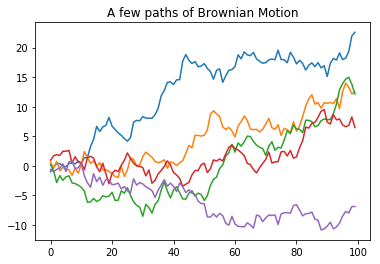

In [49]:
# Line plot example
xs = np.random.randn(5, 100)

plt.title("A few paths of Brownian Motion")
bms = xs.cumsum(1)
for bm in bms:
    plt.plot(bm)

### Scatter plot

Matplotlib can generate 2D scatter plot data.

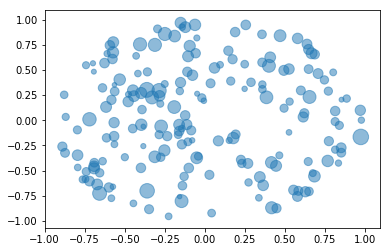

In [50]:
# Generate randomly sampled dots within the unit circle, with gamma-distributed radius
N=250
A=20
xo,yo = np.random.uniform(low=-1, high=1, size=N), np.random.uniform(low=-1, high=1, size=N)
so = A*np.random.gamma(4.5, 1.0, size=N)

x = xo[xo**2+yo**2 < 1]
y = yo[xo**2+yo**2 < 1]
s = so[xo**2+yo**2 < 1]

# Scatter plot, with _s_izes and translucent circles
plt.scatter(x, y, s=s, alpha=0.5)

### Histograms

Matplotlib can also plot historgrams from raw count data.

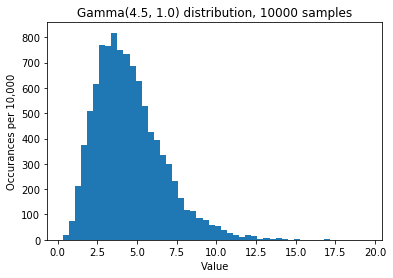

In [51]:
data = np.random.gamma(4.5, 1.0, 10000)
plt.hist(data, bins=50)
plt.title("Gamma(4.5, 1.0) distribution, 10000 samples")
plt.xlabel("Value")
plt.ylabel("Occurances per 10,000")
plt.show()

### Images

Matplotlib can plot arrays as 2D images, using a color map that you specify.

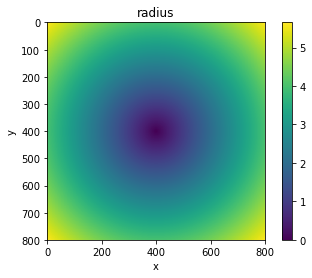

In [52]:
a = np.arange(-4, 4, 0.01)

x, y = np.meshgrid(a, a)
assert(x.shape == (len(a), len(a)))
r = np.sqrt(x ** 2 + y ** 2)
plt.imshow(r, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("radius")
plt.xlabel("x")
plt.ylabel("y")

### Statistics

Numpy can generate random numbers using functions in the `np.random` namespace.  Numpy arrays also have some built-in statistical methods.

In [59]:
x = np.random.randn(100)  # random standard normal of size 100
x.mean(), x.std(), x.sum()

(-0.057614618122226471, 0.93007882533417552, -5.7614618122226471)

Numpy also also supports more complex statistical functions.

In [60]:
np.percentile(x, 10), np.median(x), np.percentile(x, 90)

(-1.1213127699321646, -0.037002605660185275, 1.1213406011030012)